# Optical Springs

This example shows a simple example for a FINESSE simulation of an optical spring.

## The Optical Configuration

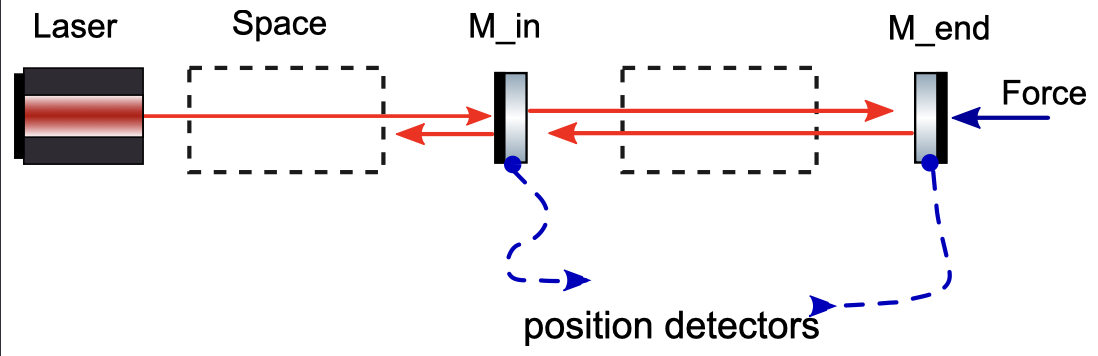

The optical lauout shows a laser beam being injected into a Fabry-Perot cavity. What we want to model here is how both of the mirrors move if we apply a force to only one of them. In this example, a force is applied to the end cavity mirror. Note that the cavity must be tuned slightly away from resonance for the optical spring to occur.

## The FINESSE Model

In [4]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    l l1 P=3
    s s1 l1.p1 Min.p1 L=1

    # The cavity
    m Min R=0.9937 L=0
    s scav Min.p2 Mend.p1 L=1
    m Mend R=1 L=0 phi=-0.048  # Roughly 40kHz detuning

    # Suspend mirrors on pendula
    pendulum sus1 Min.mech mass=0.25 fz=1 Qz=1000
    pendulum sus2 Mend.mech mass=0.25 fz=1 Qz=1000

    # Apply a `force signal' to the end mirror
    fsig(1)
    sgen force Mend.mech.F_z

    # we want to measure the longitudinal motion signal of both mirrors
    xd Mend_z Mend.mech.z
    xd Min_z Min.mech.z

    xaxis(fsig.f, log, 0.1, 1k, 300)
    """
)

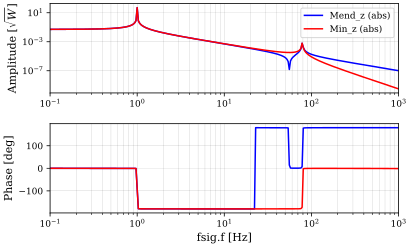

In [5]:
out = kat.run()
out.plot(log=True);

The plot shows the magnitude and phase of both mirrors' motion. An unexpected result, you may think, is that by applying a force to only one mirror, the other one also moves, despite the absence of any mechanical link between them. However, the optical beam now couples the motions of the two mirrors. This behaviour is called an optical spring: the light field circulating in the cavity essentially creates exactly the same effect as if a physical spring were connecting the mirrors. Concentrating on the magnitude of the motions first, we see two resonances: the first being the mechanical resonance of the mirror suspensions, the second being the resonance of the optical spring. If we consider the phase of the motions we can see that at low frequency the mirrors move exactly in-phase, thus the whole cavity moves together; this is called optical rigidity and can approach the stiffness of diamond! Near the optical spring resonance, the behaviour changes and at high frequencies the mirrors begin to move out of phase with one another.